# EDA

In [56]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
# load dataset
lyft_csv = 'complete_dataset.csv'


df = pd.read_csv(lyft_csv)

# check the shape of the dataset
print(df.shape)
df.head(10) 


df.info() # summary of the dataset (columns, rows, data types, memory usage, etc.)
df.describe() # summary statistics for numerical columns

# check for missing values
df.isnull().sum() # no missing values

# Snow is null for all observations but that is just with this current test dataset

(2614800, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614800 entries, 0 to 2614799
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  tavg                float64
 14  tmin                float64
 15  tmax                float64
 16  prcp                float64
 17  snow                float64
 18  wdir                float64
 19  wspd                float64
 20  wpgt                float64
 21  pres                float64
 22  tsun                float64
 23  day_of_the_week     object 
 24  Holiday   

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     384498
start_station_id       387199
end_station_name       439866
end_station_id         442601
start_lat                   0
start_lng                   0
end_lat                  2570
end_lng                  2570
member_casual               0
tavg                        0
tmin                        0
tmax                        0
prcp                        0
snow                  2614800
wdir                     5224
wspd                        0
wpgt                  2614800
pres                     5224
tsun                  2614800
day_of_the_week             0
Holiday                     0
trip_time                   0
distance_traveled        2570
average_speed               0
dtype: int64

<AxesSubplot: >

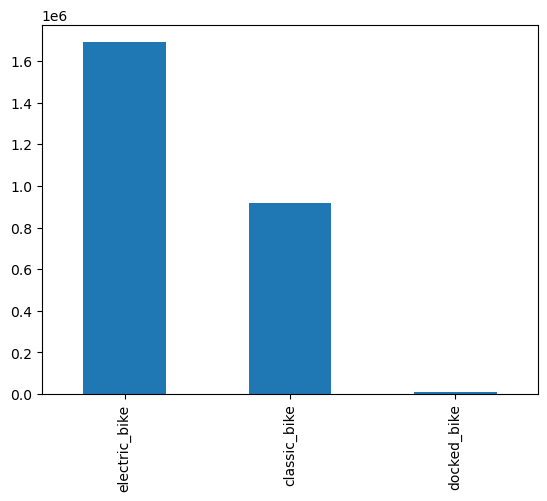

In [58]:


# check the distribution of the target variable (rideable_type):
df['rideable_type'].value_counts(normalize=True) # 0: docked_bike, 1: electric_bike
df['rideable_type'].value_counts().plot.bar() # 0: docked_bike, 1: electric_bike



## Predictor and Target Variable Exploration

#### Ride Type by of Time of Day

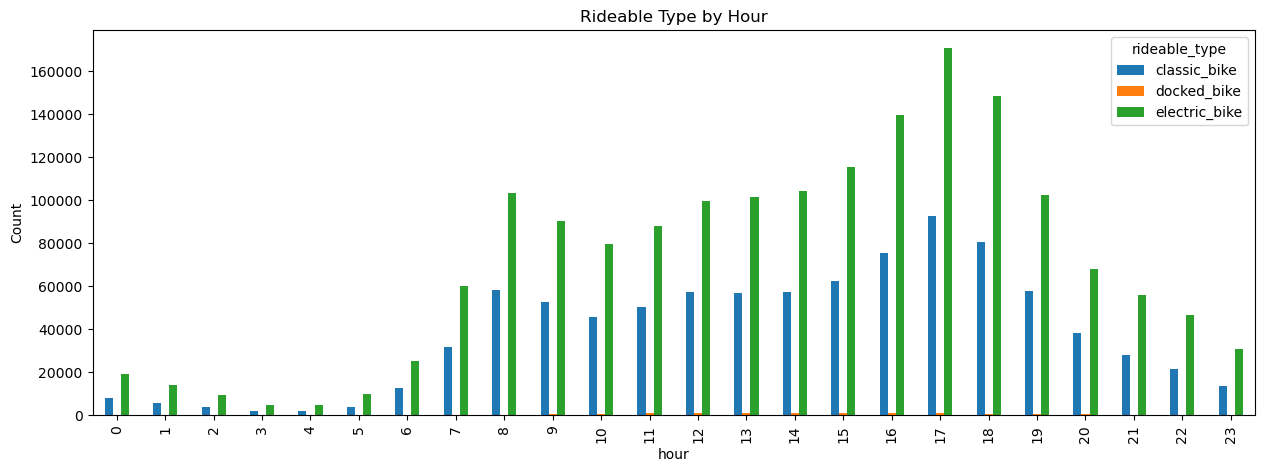

In [59]:


# view column names and data types in single dataframe
df.dtypes # all columns are numerical

# create duration column in minutes using started_at and ended_at columns
df['started_at'] = pd.to_datetime(df['started_at']) # convert started_at column to datetime
df['ended_at'] = pd.to_datetime(df['ended_at']) # convert ended_at column to datetime
df['duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]') # create duration column in minutes

# explore relationship between start_at time and rideable_type:
# create hour column from started_at column
df['hour'] = df['started_at'].dt.hour

# create a pivot table to view the relationship between hour and rideable_type
hour_rideable_type = df.pivot_table(index='hour', columns='rideable_type', values='duration', aggfunc='count')
hour_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Hour')
plt.show()





#### Ride Type duration

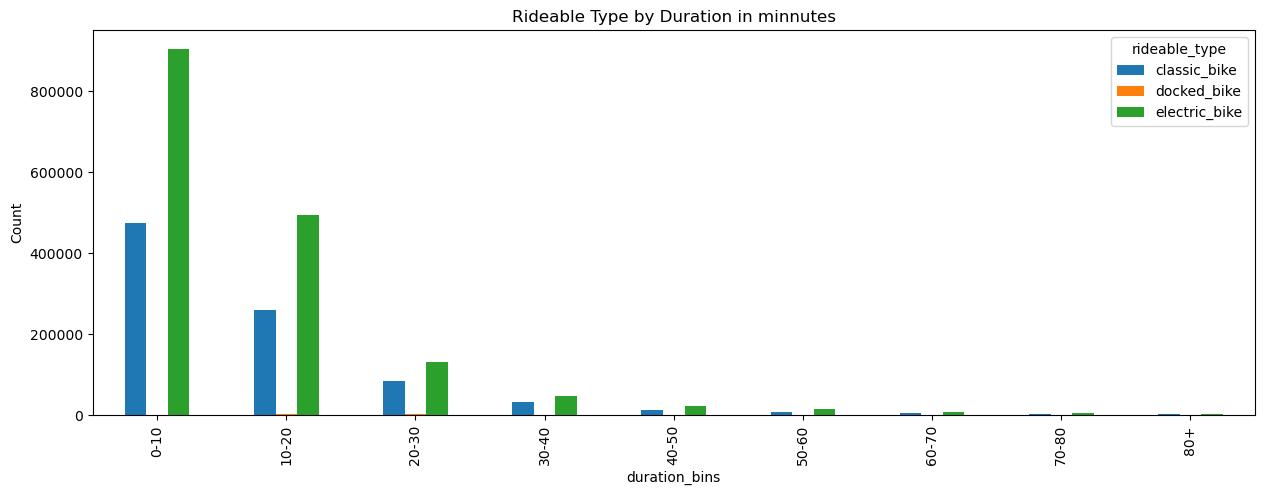

In [60]:
# Create a pivot table to view the relationship between duration (in minutes) and rideable_type, duration has high cardinality so we will bin the values

# create bins for duration (in minutes)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['duration_bins'] = pd.cut(df['duration'], bins=bins, labels=labels)

# create a pivot table to view the relationship between duration and rideable_type
duration_rideable_type = df.pivot_table(index='duration_bins', columns='rideable_type', values='duration', aggfunc='count')
duration_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Duration in minnutes')
plt.show()


#### Stations and Journeys vs Rideable Type

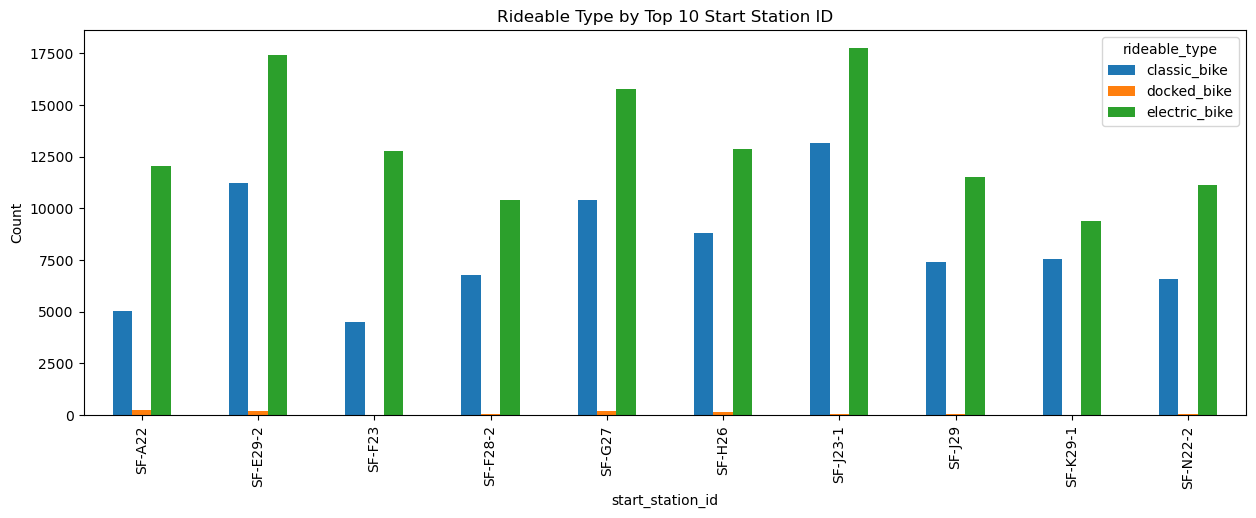

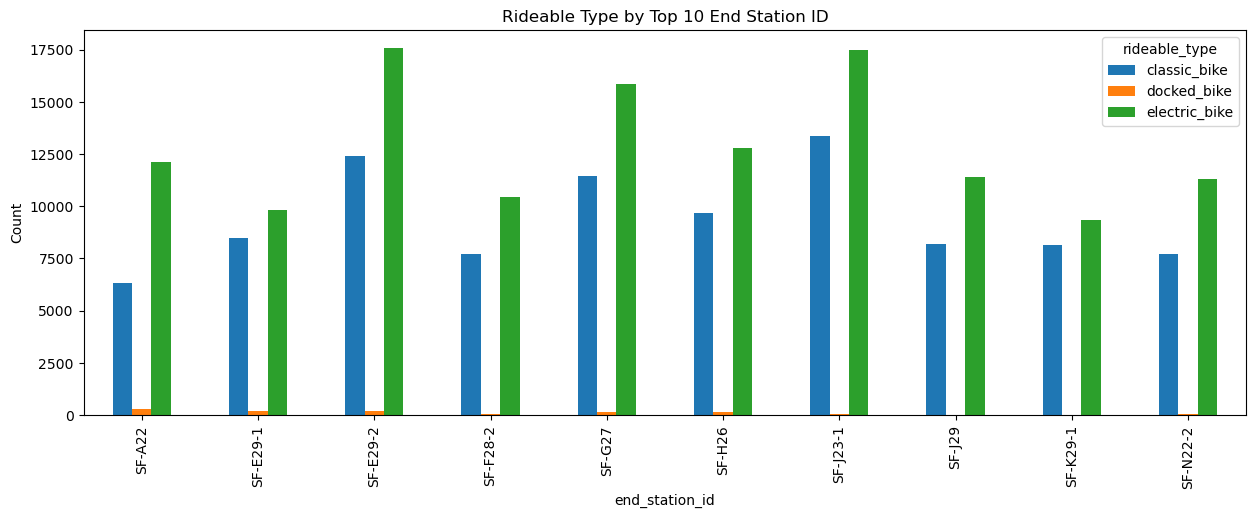

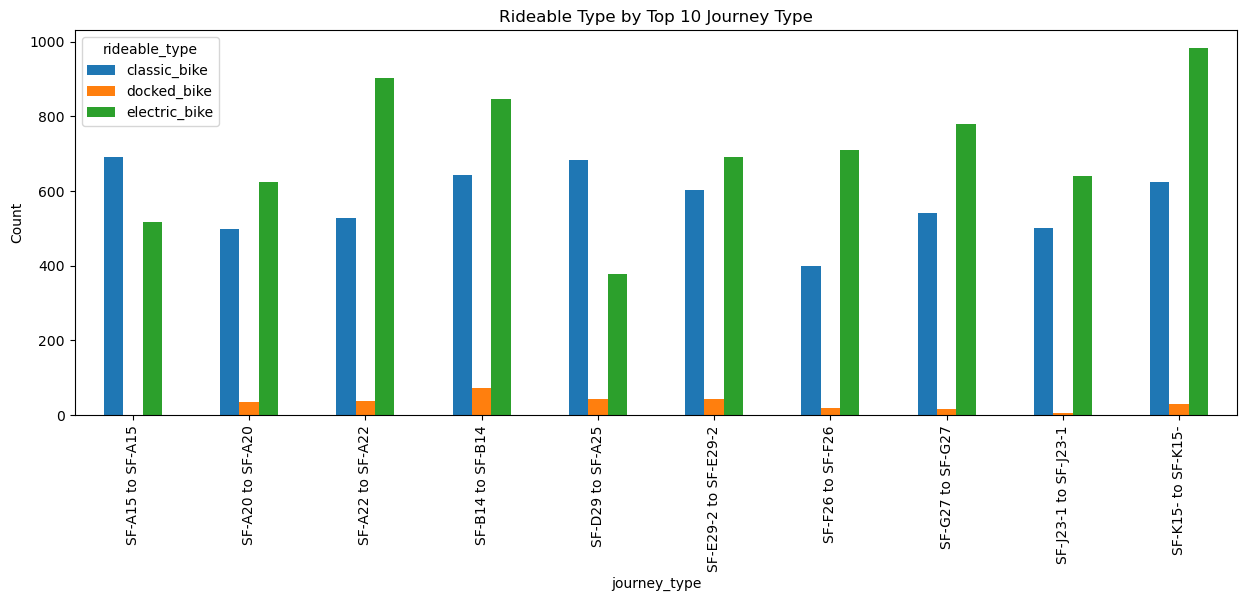

In [62]:
## Using start_station ID and end_station ID we can see the most popular start and end locations and rideable type
# Find the top 10 start stations by count
top_10_stations = df['start_station_id'].value_counts().head(10).index

# Filter the DataFrame to only include the top 10 start stations
filtered_df = df[df['start_station_id'].isin(top_10_stations)]

# exlude nan values
filtered_df = filtered_df[filtered_df['start_station_id'] != 'nan']

# Pivot table
start_station_rideable_type = filtered_df.pivot_table(index='start_station_id', columns='rideable_type', values='duration', aggfunc='count')

# Plotting
start_station_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Top 10 Start Station ID')
plt.show()

# Find the top 10 end stations by count
top_10_stations = df['end_station_id'].value_counts().head(10).index

# Filter the DataFrame to only include the top 10 end stations
filtered_df = df[df['end_station_id'].isin(top_10_stations)]

# exlude nan values
filtered_df = filtered_df[filtered_df['end_station_id'] != 'nan']

# Pivot table
end_station_rideable_type = filtered_df.pivot_table(index='end_station_id', columns='rideable_type', values='duration', aggfunc='count')

# Plotting
end_station_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Top 10 End Station ID')
plt.show()


# Now create a column showing journey types (start and end station ID) and rideable type (excluding nan values)
df['journey_type'] = df['start_station_id'].astype(str) + ' to ' + df['end_station_id'].astype(str)

# Exclude rows where either start_station_id or end_station_id is NaN
df = df[pd.notna(df['start_station_id']) & pd.notna(df['end_station_id'])]

# Find the top 10 journey types by count
top_10_journeys = df['journey_type'].value_counts().head(10).index

# Filter the DataFrame to only include the top 10 journey types
filtered_df = df[df['journey_type'].isin(top_10_journeys)]

# Pivot table
journey_type_rideable_type = filtered_df.pivot_table(index='journey_type', columns='rideable_type', values='duration', aggfunc='count')

# Plotting
journey_type_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Top 10 Journey Type')
plt.show()


